<a href="https://colab.research.google.com/github/gitmystuff/DTSC4050/blob/main/Final_Project/Final_Project_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Guide

This notebook serves as a practical companion, providing you with the code and examples necessary to navigate the entire data science workflow, starting with the synthetic data to building and evaluating predictive models.

Throughout the semester, we've explored key statistical concepts and their application in the data science pipeline. Now, it's time to apply this knowledge to a hands-on project. This notebook is designed to be a valuable resource, offering executable code snippets and topics for you to explore for each major stage of your project.

We will walk through the process covering:

* **Data Generation:** Data that was generated for your story with tools like Faker, defining target variables, and realistic "messiness" for robust analysis.
* **Exploratory Data Analysis (EDA):** Dive into your data to understand its structure, identify patterns, and uncover insights through techniques like correlation analysis, multicollinearity checks, outlier detection, and various visualization methods. Effective storytelling with your data is a key outcome here.
* **Data Preprocessing:** Code to prepare your data for modeling by handling missing values, scaling features, addressing outliers, etc.
* **Feature Engineering & Selection:** Examples for categorical encoding and selecting the most relevant ones to improve model performance, including techniques like One-Hot Encoding (OHE).
* **Statistical Modeling:** Code to implement and evaluate both linear regression and logistic regression models for different types of prediction tasks.

This notebook is structured to follow a typical data science project flow, with sections dedicated to each of the topics listed. Use the provided code as a starting point, adapt it to your specific project story and goals, and remember to leverage the statistical principles we've discussed in class to inform your decisions at each step.

Good luck with your final projects!

## The Data

### Seed the Project

In [ ]:
import time
import random
import numpy as np

def generate_user_seed():
    """
    Generates a seed for NumPy's random number generator based on current time and a random component.

    Returns:
        int: An integer to be used as a seed.
    """
    # Get current time in nanoseconds
    nanoseconds = time.time_ns()

    # Add a small random component
    random_component = random.randint(0, 1000)

    # Combine them (XOR is a good way to mix values)
    seed = nanoseconds ^ random_component

    # Ensure the seed is within the valid range for numpy's seed
    seed = seed % (2**32)

    return seed

user_seed = generate_user_seed()
print(f"Generated seed: {user_seed}")


np.random.seed(user_seed)

random_state = user_seed
print(f"Random state: {random_state}")


Generated seed: 2280765978
Random state: 2280765978


### Faker

In [ ]:
pip install Faker -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.0 MB/s eta 0:00:00


In [ ]:
# HCL = High Cardinality Label (would represent features that list states, or cities, etc.)
hcl = [
    "HCL 1",
    "HCL 2",
    "HCL 3",
    "HCL 4",
    "HCL 5",
    "HCL 6",
    "HCL 7",
    "HCL 8",
    "HCL 9",
    "HCL 10",
    "HCL 11",
    "HCL 12",
    "HCL 13",
    "HCL 14",
    "HCL 15",
    "HCL 16",
    "HCL 17",
    "HCL 18",
    "HCL 19",
    "HCL 20",
    "HCL 21",
    "HCL 22",
    "HCL 23",
    "HCL 24",
    "HCL 25",
    "HCL 26",
    "HCL 27",
    "HCL 28",
    "HCL 29",
    "HCL 30",
    "HCL 31",
    "HCL 32",
    "HCL 33",
    "HCL 34",
    "HCL 35",
    "HCL 36",
    "HCL 37",
    "HCL 38",
    "HCL 39",
    "HCL 40",
    "HCL 41",
    "HCL 42",
    "HCL 43",
    "HCL 44",
    "HCL 45",
    "HCL 46",
    "HCL 47",
    "HCL 48",
    "HCL 49",
    "HCL 50"
]

In [ ]:
# create demographic data
import numpy as np
import pandas as pd
from faker import Faker
fake = Faker()

n = 1000

output = []
for x in range(n):
    binary_labels = np.random.choice(['bl 1', 'bl 2'], p=[0.5, 0.5]) # bl = binary label
    output.append({
        'categorical_1': binary_labels,
        'categorical_2': np.random.choice(['cl 1', 'cl 2', 'cl 3']), # cl = categorical label
        'name_1': fake.first_name_female() if binary_labels == 'bl 1' else fake.first_name_male(),
        'name_2': fake.last_name(),
        'code': fake.zipcode(),
        'date': fake.date_of_birth(),
        'location': np.random.choice(hcl)
    })

demographics = pd.DataFrame(output)
print(demographics.shape)
demographics.head()

(1000, 7)


,categorical_1,categorical_2,name_1,name_2,code,date,location
0,bl 2,cl 3,Jason,Stanton,28529,1966-01-27,HCL 5
1,bl 2,cl 1,Brett,Graves,59133,1940-01-20,HCL 16
2,bl 2,cl 2,Jonathan,Wall,26410,1984-02-29,HCL 28
3,bl 2,cl 3,Robert,Cole,07477,1941-01-18,HCL 28
4,bl 1,cl 1,Kelly,Foster,20747,2011-09-11,HCL 11


### Make Targets

Depending on your story this code generates two targets:

* Continuous target is for linear regression analysis
* Binary classification target is for logistic regression analysis

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

n_features = 3
noise = 10

features, continuous_target = make_regression(n_samples=n,
                                               n_features=n_features,
                                               noise=noise,
                                               random_state=random_state)

df = pd.DataFrame(features, columns=[f'feature_{i+1}' for i in range(n_features)])
df['continuous_target'] = continuous_target

threshold = df['continuous_target'].mean()
df['binary_classification_target'] = np.where(df['continuous_target'] >= threshold, 1, 0)
df = pd.concat([demographics, df], axis=1).reset_index(drop=True)
print(df.head())

  categorical_1 categorical_2    name_1   name_2   code        date location  \
0          bl 2          cl 3     Jason  Stanton  28529  1966-01-27    HCL 5   
1          bl 2          cl 1     Brett   Graves  59133  1940-01-20   HCL 16   
2          bl 2          cl 2  Jonathan     Wall  26410  1984-02-29   HCL 28   
3          bl 2          cl 3    Robert     Cole  07477  1941-01-18   HCL 28   
4          bl 1          cl 1     Kelly   Foster  20747  2011-09-11   HCL 11   

   feature_1  feature_2  feature_3  continuous_target  \
0  -0.977630  -1.251450   0.633488         -78.140043   
1  -1.132657  -1.959065  -1.280109        -233.883540   
2   0.451197  -1.159204  -0.326484         -86.217691   
3   0.898637  -0.063328  -1.248298         -27.070538   
4  -2.041171   1.816167  -1.255960          13.263339   

   binary_classification_target  
0                             0  
1                             0  
2                             0  
3                             0  
4     

### Automation Functions

These functions are used to create features and messy data.

* gen_null(series, perc)
* gen_quasi_constants(primary_label, variation_percentage=.2, replace=False)
* gen_normal_data(mu=0, std=1, size=len(df))
* gen_uniform_data(size=len(df))
* gen_multivariate_normal_data(mean=[0, 0], cov=[[1, 0], [0, 1]], size=len(df))
* gen_correlated_normal_series(original_series, target_correlation, size=len(df))
* gen_correlated_uniform_series(original_series, correlation_coefficient=0, size=len(df))
* gen_corrwith_target_feature(df, class_col, coeff, intercept)
* gen_discrete_values(n_rows: int, n_classes: int = 3)
* gen_cat_corr_with_cat_target(binary_target: pd.Series, n_categories=3, correlation_strength=0.7)
* gen_outliers(mean=0, std_dev=1, size=len(df), outlier_percentage=0.1, outlier_magnitude=3)
* gen_standard_scaling(mean=50, std_dev=10, size=len(df), scale_factor=1000)
* gen_minmax_scaling(mean=50, std_dev=10, size=len(df), range_factor=10)
* random_choice_data(choices, size)

In [ ]:
# functions
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize


def gen_null(series, perc):
  """
  Introduces null values (np.nan) into a list based on a specified percentage.

  Args:
      var: The variable to modify.
      perc: The percentage of values to replace with nulls (0-100).

  Returns:
      The modified variable with null.
  """
  var = series.copy()
  num_nulls = int(len(var) * (perc / 100))
  indices_to_replace = np.random.choice(len(var), num_nulls, replace=False)

  for idx in indices_to_replace:
      var[idx] = np.nan

  return var

def gen_quasi_constants(primary_label, variation_percentage=.2, size=len(df)):
  """
  Generates quasi-constant labels for a Series, with a small percentage of variation.

  Args:
      primary_label: The main label to use for most values.
      variation_percentage: The percentage of labels to vary (0-100).

  Returns:
      A new Series containing the quasi-constant labels.
  """

  series = pd.Series(np.full(size, primary_label))
  num_variations = int(size * (variation_percentage / 100))
  variation_indices = np.random.choice(series.index, num_variations, replace=False)
  primary_label = primary_label + '_0'
  variation1 = primary_label + '_1'
  variation2 = primary_label + '_2'

  labels = pd.Series([primary_label] * len(series), index=series.index)
  labels.loc[variation_indices] = np.random.choice([variation1, variation2], size=num_variations)  # Adjust variations as needed

  return labels

def gen_normal_data(mu=0, std=1, size=len(df)):
  """
  Generates a normal dataset given the mean and standard deviation

  Args:
        mu: The mean of the normal distribution.
        std: The standard deviation of the normal distribution.
        size: The number of data points to generate.

  Returns:
        A normally distributed series.
  """
  return np.random.normal(mu, std, size)

def gen_uniform_data(size=len(df)):
  """
  Generates a uniform dataset

  Args:
        size: The number of data points to generate.

  Returns:
        A uniform distributed series.
  """
  return np.random.uniform(size=size)

def gen_multivariate_normal_data(mean=[0, 0], cov=[[1, 0], [0, 1]], size=len(df)):
  """
  Generates two datasets with a multivariate normal distribution given the mean and covariance matrix

  Args:
        mean: The mean of each of the datasets.
        cov: The covariance matrix of the datasets.
        size: The number of data points to generate.

  Returns:
        Two correlated series.
  """
  ds1, ds2 = np.random.multivariate_normal(mean, cov, size, tol=1e-6).T # ds = dataset
  return ds1, ds2

def gen_correlated_normal_series(original_series, target_correlation, size=len(df)):
  """
  Generates a correlated series based on a given series.

  This function takes an original series as input and generates a new series
  that is correlated with the original series. The correlation between the
  original and generated series is approximately equal to the specified
  target correlation.

  The generated series is created by linearly transforming the original series
  and adding Gaussian noise with an adjusted standard deviation to achieve the
  desired correlation.

  Args:
      original_series (numpy.ndarray): The original series.
      target_correlation (float): The desired Pearson correlation coefficient
          between the original and generated series.

  Returns:
      numpy.ndarray: The generated correlated series.
  """
  return np.mean(original_series) + target_correlation * (original_series - np.mean(original_series)) \
  +  np.random.normal(0, np.sqrt(1 - target_correlation**2) * np.std(original_series), len(original_series))
  """
  Explanation

  This one-liner leverages the properties of linear transformations and normal distributions to generate a correlated series.

  It first centers the original_series by subtracting its mean.
  It then scales this centered series by the target_correlation.
  Finally, it adds Gaussian noise with a standard deviation adjusted to ensure the overall correlation matches the target_correlation.
  """

def gen_correlated_uniform_series(original_series, correlation_coefficient=0, size=len(df)):
  """
  Work in progress

  Generates a new series correlated with the given series based on the specified correlation coefficient,
  using rank correlation to ensure the generated series follows a uniform distribution.

  Args:
      original_series (numpy.ndarray or list): The original series.
      correlation_coefficient (float): The desired correlation coefficient between the original and generated series.
      size: The number of data points to generate.

  Returns:
      The generated correlated series with a uniform distribution.
  """
  z_scores = (original_series - np.mean(original_series)) / np.std(original_series)
  correlation_coefficient=.7
  return norm.cdf(correlation_coefficient * norm.ppf(np.random.uniform(size=size)) + np.sqrt(1 - correlation_coefficient**2) * z_scores)

def gen_corrwith_target_feature(df, class_col, coeff, intercept):
    """
    Generates normally distributed feature data for a logistic regression model.

    Args:
        df: The pandas DataFrame containing the class column.
        class_col: The name of the class column (containing 0s and 1s).
        coeff: The coefficient for the feature in the logistic regression model.
        intercept: The intercept of the logistic regression model.

    Returns:
        A pandas Series containing the generated feature data.
    """

    # Generate probabilities based on the class
    probs = np.random.rand(len(df))  # Initial random probabilities
    probs = np.where(df[class_col] == 1, probs * 0.8 + 0.2, probs * 0.8)  # Adjust for class

    # Apply the inverse logit (logit) function
    logits = np.log(probs / (1 - probs))

    # Calculate the feature values
    feature_values = (logits - intercept) / coeff

    return pd.Series(feature_values)

import pandas as pd
import numpy as np

# Define a global or pass random_state if needed
# For simplicity here, let's assume it's available
# random_state = 42
# np.random.seed(random_state)


def gen_discrete_values(n_rows: int, n_classes: int = 3, labels: list = None) -> pd.Series:
    """
    Generates a Pandas Series of discrete text values.

    Args:
        n_rows (int): The number of rows (data points) to generate.
        n_classes (int, optional): The number of distinct classes. Defaults to 3.
        labels (list, optional): A list of strings to use as labels.
                                  Must have length equal to n_classes.
                                  If None, defaults to string representations of numbers ('0', '1', '2', ...).

    Returns:
        pd.Series: A Pandas Series containing the discrete text values.
    """
    # Input Validation
    if not isinstance(n_rows, int) or n_rows <= 0:
        raise ValueError("n_rows must be a positive integer.")
    if not isinstance(n_classes, int) or n_classes <= 1:
        raise ValueError("n_classes must be an integer greater than 1.")
    # Removed random_state validation as it's not an arg here, assuming np.random is seeded elsewhere or used globally.
    # If random_state is meant to be an argument, add it back and validate.

    if labels is not None:
        if not isinstance(labels, list):
            raise ValueError("labels must be a list.")
        if len(labels) != n_classes:
            raise ValueError(f"Length of labels ({len(labels)}) must match n_classes ({n_classes}).")
        if not all(isinstance(label, str) for label in labels):
             raise ValueError("All items in the labels list must be strings.")


    # Generate the discrete values using numpy (as integers 0 to n_classes-1)
    discrete_values_int = np.random.randint(0, n_classes, n_rows)

    # Create default labels if none are provided (string representations of integers)
    if labels is None:
        labels = [str(i) for i in range(n_classes)]

    # Create a mapping from integer index to text label
    # Ensure the mapping keys are the *integers* generated by randint
    mapping = {i: labels[i] for i in range(n_classes)}

    # Convert to Pandas Series and apply the mapping
    # Convert integer array to Series first, then map
    discrete_series = pd.Series(discrete_values_int, name='discrete_values')
    discrete_series_mapped = discrete_series.map(mapping)

    # Optionally, convert the mapped Series to 'category' dtype for efficiency/clarity
    return discrete_series_mapped.astype('category')

# def gen_discrete_values(n_rows: int, n_classes: int = 3) -> pd.Series:
#     """
#     Generates a Pandas Series of discrete values.

#     Args:
#         n_rows (int): The number of rows (data points) to generate.
#         n_classes (int, optional): The number of distinct classes. Defaults to 3.

#     Returns:
#         pd.Series: A Pandas Series containing the discrete values.
#     """
#     # Input Validation
#     if not isinstance(n_rows, int) or n_rows <= 0:
#         raise ValueError("n_rows must be a positive integer.")
#     if not isinstance(n_classes, int) or n_classes <= 1:
#         raise ValueError("n_classes must be an integer greater than 1.")
#     if not isinstance(random_state, int):
#         raise ValueError("random_state must be an integer.")

#     # Generate the discrete values using numpy
#     discrete_values = np.random.randint(0, n_classes, n_rows)
#     discrete_values_as_strings = discrete_values.astype(str)

#     # Convert to Pandas Series
#     return pd.Series(discrete_values_as_strings, name='discrete_values')

def gen_cat_corr_with_cat_target(binary_target: pd.Series, n_categories=3, correlation_strength=0.7) -> pd.Series:
    """
    Generates a Pandas Series of a single categorical feature correlated with an existing binary target Series.

    Args:
        binary_target (pd.Series): The binary target pd.Series.
        n_categories (int, optional): Number of categories. Defaults to 3.
        correlation_strength (float, optional): Correlation strength (0 to 1). Defaults to 0.7.
        seed (int, optional): Random seed. Defaults to 42.

    Returns:
        pd.Series: A Pandas Series representing the correlated categorical feature.
    """
    rng = np.random.default_rng()
    prob_threshold = 0.5 + (correlation_strength - 0.5)
    return pd.Series(np.where((binary_target == 1) & (rng.random(size=len(binary_target)) < prob_threshold),
                             rng.integers(1, n_categories, size=len(binary_target)), 0), dtype='category')

def pearson_r_func(x, y, y_mean, y_std, desired_r):
    x_mean = np.mean(x)
    x_std = np.std(x)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = x_std * y_std * len(x)
    calculated_r = numerator / denominator
    return (calculated_r - desired_r)**2  # Minimize the squared difference

def minimize_r(original_series, target_correlation, size=len(df)):
    y = original_series
    y_mean = np.mean(y)
    y_std = np.std(y)
    desired_r = target_correlation

    # Initial guess for x values
    x0 = np.random.uniform(size=len(original_series))

    # Solve for x
    result = minimize(pearson_r_func, x0, args=(y, y_mean, y_std, desired_r))

    if result.success:
        x_solution = result.x
        # print("Solution for x:", x_solution)
        return x_solution
    else:
        print("Optimization failed.")

def gen_outliers(mean=0, std_dev=1, size=len(df), outlier_percentage=0.1, outlier_magnitude=3):
    """
    Generates a normal distribution with outliers.

    Args:
        mean (float): The mean of the normal distribution.
        std_dev (float): The standard deviation of the normal distribution.
        size (int): The number of samples to generate.
        outlier_percentage (float): The percentage of outliers to introduce (between 0 and 1).
        outlier_magnitude (float): The magnitude by which outliers deviate from the mean.

    Returns:
        numpy.ndarray: The generated data with outliers.
    """
    data = np.random.normal(mean, std_dev, size)
    num_outliers = int(size * outlier_percentage)
    outlier_indices = np.random.choice(size, num_outliers, replace=False)
    for index in outlier_indices:
        if np.random.rand() < 0.5:
            data[index] += outlier_magnitude
        else:
            data[index] -= outlier_magnitude

    return data

def gen_standard_scaling(mean=50, std_dev=10, size=len(df), scale_factor=1000):
  """
  Generates data with a specified mean and standard deviation, then scales it by a factor to create a distribution needing scaling.

  Args:
      mean (float): The mean of the original distribution.
      std_dev (float): The standard deviation of the original distribution.
      size (int): The number of samples to generate.
      scale_factor (float): The factor by which to scale the original distribution.

  Returns:
      numpy.ndarray: The generated data needing scaling.
  """
  original_data = np.random.normal(mean, std_dev, size)
  return original_data * scale_factor

def gen_minmax_scaling(mean=50, std_dev=10, size=len(df), range_factor=10):
  """
  Generates data with a specified mean and standard deviation, then scales and shifts it to create a distribution needing MinMax scaling.

  Args:
      mean (float): The mean of the original distribution.
      std_dev (float): The standard deviation of the original distribution.
      size (int): The number of samples to generate.
      range_factor (float): The factor to expand the range of the original distribution.

  Returns:
      numpy.ndarray: The generated data needing scaling.
  """

  # Generate the original data
  original_data = np.random.normal(mean, std_dev, size)

  # Expand the range of the data
  min_val = np.min(original_data)
  max_val = np.max(original_data)
  return (original_data - min_val) * range_factor + min_val

def random_choice_data(choices, size):
  """
  Generates a new series correlated with the given series based on the specified correlation coefficient,
  using rank correlation to ensure the generated series follows a uniform distribution.

  Args:
      original_series (numpy.ndarray or list): The original series.
      correlation_coefficient (float): The desired correlation coefficient between the original and generated series.

  Returns:
      numpy.ndarray: The generated correlated series with a uniform distribution.
  """
  return np.random.choice(choices, size=size)


### Create Features and Messy Data

In [ ]:
# categorical variables with little correlation to target
df['random choice 2'] = random_choice_data(['Rand Choice 1', 'Rand Choice 2'], size=len(df))
df['random choice 4'] = random_choice_data(['North', 'South', 'East', 'West'], size=len(df))
df['random choice 7'] = random_choice_data(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], size=len(df))

# categorical random choices with random # of labels
num_labels = np.random.randint(3, 5)
df[f'random label num {num_labels}'] = random_choice_data([f'label num lo {i}' for i in range(1, num_labels + 1)], size=len(df))

num_labels = np.random.randint(10, 15)
df[f'random label num {num_labels}'] = random_choice_data([f'label num hi {i}' for i in range(1, num_labels + 1)], size=len(df))

In [ ]:
# categorical variables correlated with continuous target
df['pd qcut1'] = pd.qcut(df['continuous_target'], 2, labels=['Low', 'High']) # bi label
df['pd qcut2'] = pd.qcut(df['continuous_target'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4']) # 4 labels

quantiles = [0, 0.1, 0.2, 0.4, 0.6, 0.8, 1]
df['pd qcut3'] = pd.qcut(df['continuous_target'], quantiles, labels=['G1', 'G2', 'G3', 'G4', 'G5', 'G6']) # 6 labels

In [ ]:
# categorical variables correlated with binary classification target
df['cat_corr_with_cat_target 1'] = gen_cat_corr_with_cat_target(df['binary_classification_target'], correlation_strength=0.7)
df['cat_corr_with_cat_target 2'] = gen_cat_corr_with_cat_target(df['binary_classification_target'], correlation_strength=0.9)

In [ ]:
# generate four numerical normally distributed continuous features that have a correlation greater than absolute value of .5 with each other
# gen_multivariate_normal_data(mean=[0, 0], cov=[[1, 0], [0, 1]], size=len(df))
df['multicollinearity 1'], df['multicollinearity 2'] = gen_multivariate_normal_data(mean=[0, 0], cov=[[1, .7], [.7, 1]], size=len(df))
df['multicollinearity 3'], df['multicollinearity 4'] = gen_multivariate_normal_data(mean=[0, 0], cov=[[1, .9], [.9, 1]], size=len(df))

In [ ]:
# generate two normally distributed features that are correlated with the continuous target
df['correlated w continuous target 1'] = gen_correlated_normal_series(df['continuous_target'], target_correlation=.5)
df['correlated w continuous target 2'] = gen_correlated_normal_series(df['continuous_target'], target_correlation=.7)

In [ ]:
def gen_correlated_normal_series_binary(binary_target: pd.Series, target_correlation: float = 0.5) -> pd.Series:
    """
    Generates a Pandas Series of normally distributed values that are correlated with an existing binary classification target (0 or 1).

    Args:
        binary_target (pd.Series): The Pandas Series representing the binary classification target (containing only 0s and 1s).
        target_correlation (float, optional): The desired correlation between the generated normal series and the binary target.
            Must be between -1 and 1.  Defaults to 0.5.
        random_state (int, optional): Random seed for reproducibility. Defaults to 42.

    Returns:
        pd.Series: A Pandas Series of normally distributed values correlated with the binary target.

    Raises:
        ValueError: If `binary_target` is not a Pandas Series or does not contain only 0s and 1s,
                    or if `target_correlation` is not between -1 and 1.
    """
    # Input validation
    if not isinstance(binary_target, pd.Series):
        raise ValueError("binary_target must be a Pandas Series.")
    if not all(value in [0, 1] for value in binary_target):
        raise ValueError("binary_target must contain only 0s and 1s.")
    if not isinstance(target_correlation, (int, float)) or not -1 <= target_correlation <= 1:
        raise ValueError("target_correlation must be a float between -1 and 1 (inclusive).")
    if not isinstance(random_state, int):
        raise ValueError("random_state must be an integer.")

    rng = np.random.default_rng()

    # Separate data for target 0 and 1
    target_0_data = binary_target[binary_target == 0]
    target_1_data = binary_target[binary_target == 1]

    # Generate base normal distributions for each target value
    base_normal_0 = rng.normal(loc=0, scale=1, size=len(target_0_data))
    base_normal_1 = rng.normal(loc=1, scale=1, size=len(target_1_data))

    # Combine the base normals, preserving the original order of binary_target
    combined_normal = pd.Series(index=binary_target.index, dtype='float64')  # Important:  Preserve original index!
    combined_normal[binary_target == 0] = base_normal_0
    combined_normal[binary_target == 1] = base_normal_1

    # Adjust the combined normal to achieve the desired correlation
    correlated_normal = combined_normal * target_correlation + rng.normal(loc=0, scale=np.sqrt(1 - target_correlation**2), size=len(binary_target))

    return pd.Series(correlated_normal, index=binary_target.index) # Ensure the index is the same as the binary target


In [ ]:
# generate two normally distributed features that are correlated with the binary classification target
df['correlated w binary_classification_target 1'] = gen_correlated_normal_series_binary(df['binary_classification_target'], target_correlation=.5)
df['correlated w binary_classification_target 2'] = gen_correlated_normal_series_binary(df['binary_classification_target'], target_correlation=.7)

In [ ]:
print(type(random_state))

<class 'int'>


In [ ]:
# generate two uniformly distributed features that are correlated with the target
df['uniform corr 1'] = gen_correlated_uniform_series(df['continuous_target'])
df['uniform corr 2'] = gen_correlated_uniform_series(df['continuous_target'])

In [ ]:
# create two features that are duplicates of other features
df['duplicate_1'] = df['feature_1']
df['duplicate_2'] = df['feature_2']

In [ ]:
# create two numerical features with outliers
df['outliers 1'] = gen_outliers(mean=0, std_dev=1, size=len(df), outlier_percentage=0.1, outlier_magnitude=3)
df['outliers 2'] = gen_outliers(mean=3, std_dev=2, size=len(df), outlier_percentage=0.2, outlier_magnitude=2)

In [ ]:
# create a numerical feature that needs standard scaling
df['standard scaling'] = gen_standard_scaling()

In [ ]:
# create a numerical feature that needs min max scaling
df['min max scaling'] = gen_minmax_scaling()

In [ ]:
# generate null values
for col in df.drop(['continuous_target', 'binary_classification_target', 'feature_1', 'feature_2', 'feature_3', 'duplicate_1', 'duplicate_2'], axis=1).columns:
    df[col] = gen_null(df[col], np.random.choice([0, 5, 10, 20, 30, 50], size=1).item())

In [ ]:
# create two features that have constant values
df['constant_1'] = 'constant_value'
df['constant_2'] = 'constant_value'

In [ ]:
# create two features with semi constant values
df['semi_constant_1'] = gen_quasi_constants('q_const', variation_percentage = 1)
df['semi_constant_2'] = gen_quasi_constants('q_const', variation_percentage = 1)

In [ ]:
# create two discrete features
# df['discrete 1'] = gen_discrete_values(n_rows=n, n_classes=3)
# df['discrete 2'] = gen_discrete_values(n_rows=n, n_classes=5)
# df[['discrete 1', 'discrete 2']] = df[['discrete 1', 'discrete 2']].astype('category')

# Using custom labels ('Low', 'Medium', 'High')
custom_labels = ['Low', 'Medium', 'High']
df['discrete 1'] = gen_discrete_values(n_rows=n, n_classes=3, labels=custom_labels)
# print("Series with custom labels:")
# print(series_custom_labels.head())
# print(series_custom_labels.dtype) # Will show 'category'

# print("\n" + "="*20 + "\n")

# Using different custom labels
custom_labels_5 = ['sad', 'blue', 'meh', 'ok', 'happy']
df['discrete 2'] = gen_discrete_values(n_rows=n, n_classes=5, labels=custom_labels_5)
# print("Series with 5 custom labels:")
# print(series_custom_labels_5.head())
# print(series_custom_labels_5.dtype) # Will show 'category'


In [ ]:
# add duplicates
dupes = df.loc[0:9]
df = pd.concat([df, dupes], axis=0)

# shuffle selected columns
demographic_columns = demographics.columns
remaining_columns = [col for col in df.columns if col not in demographic_columns]
# print(remaining_columns)
np.random.shuffle(remaining_columns)

# Reassemble the DataFrame with the shuffled columns
df = df[list(demographic_columns) + list(remaining_columns)]

# move target to the end of the list
class_vars = ['continuous_target', 'binary_classification_target']
df = df[df.drop(class_vars, axis=1).columns.tolist() + class_vars]

print(df.shape)
print(df.info())
df.head()

(1010, 44)
<class 'pandas.core.frame.DataFrame'>
Index: 1010 entries, 0 to 9
Data columns (total 44 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   categorical_1                                706 non-null    object  
 1   categorical_2                                807 non-null    object  
 2   name_1                                       1010 non-null   object  
 3   name_2                                       1010 non-null   object  
 4   code                                         707 non-null    object  
 5   date                                         809 non-null    object  
 6   location                                     959 non-null    object  
 7   discrete 2                                   1010 non-null   category
 8   standard scaling                             505 non-null    float64 
 9   multicollinearity 4                          910 non-null   

,categorical_1,categorical_2,name_1,name_2,code,date,location,discrete 2,standard scaling,multicollinearity 4,...,duplicate_2,random choice 2,correlated w continuous target 2,random label num 13,uniform corr 2,outliers 2,uniform corr 1,min max scaling,continuous_target,binary_classification_target
0,NaN,cl 3,Jason,Stanton,28529,1966-01-27,HCL 5,sad,NaN,0.045339,...,-1.251450,Rand Choice 2,-58.319251,label num hi 1,0.246115,3.930181,NaN,293.074473,-78.140043,0
1,bl 2,NaN,Brett,Graves,59133,1940-01-20,HCL 16,ok,NaN,0.480567,...,-1.959065,Rand Choice 1,-199.278285,label num hi 7,0.022258,2.966750,0.343847,297.838168,-233.883540,0
2,NaN,cl 2,Jonathan,Wall,26410,NaN,HCL 28,happy,NaN,0.460851,...,-1.159204,NaN,-43.053587,label num hi 9,0.478828,-0.371389,0.281476,508.592983,-86.217691,0
3,bl 2,NaN,Robert,Cole,NaN,1941-01-18,HCL 28,meh,NaN,-0.016080,...,-0.063328,Rand Choice 1,-104.751808,label num hi 1,0.011607,4.780600,0.286425,387.171507,-27.070538,0
4,bl 1,cl 1,Kelly,Foster,NaN,2011-09-11,HCL 11,blue,NaN,1.125582,...,1.816167,Rand Choice 1,-15.964666,NaN,0.683147,1.424828,0.760708,335.818660,13.263339,1


In [ ]:
df.to_csv('final_project_data.csv', index=False)

## Exploratory Data Analysis

### Load Data

In [ ]:
import pandas as pd

df = pd.read_csv('final_project_data.csv')
# this next line is needed to demonstrate features with discrete values
df[['discrete 1', 'discrete 2']] = df[['discrete 1', 'discrete 2']].astype('category')
print(df.shape)
print(df.info())
df.head()

(1010, 44)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 44 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   categorical_1                                706 non-null    object  
 1   categorical_2                                807 non-null    object  
 2   name_1                                       1010 non-null   object  
 3   name_2                                       1010 non-null   object  
 4   code                                         707 non-null    float64 
 5   date                                         809 non-null    object  
 6   location                                     959 non-null    object  
 7   discrete 2                                   1010 non-null   category
 8   standard scaling                             505 non-null    float64 
 9   multicollinearity 4                          910 non

,categorical_1,categorical_2,name_1,name_2,code,date,location,discrete 2,standard scaling,multicollinearity 4,...,duplicate_2,random choice 2,correlated w continuous target 2,random label num 13,uniform corr 2,outliers 2,uniform corr 1,min max scaling,continuous_target,binary_classification_target
0,NaN,cl 3,Jason,Stanton,28529.0,1966-01-27,HCL 5,sad,NaN,0.045339,...,-1.251450,Rand Choice 2,-58.319251,label num hi 1,0.246115,3.930181,NaN,293.074473,-78.140043,0
1,bl 2,NaN,Brett,Graves,59133.0,1940-01-20,HCL 16,ok,NaN,0.480567,...,-1.959065,Rand Choice 1,-199.278285,label num hi 7,0.022258,2.966750,0.343847,297.838168,-233.883540,0
2,NaN,cl 2,Jonathan,Wall,26410.0,NaN,HCL 28,happy,NaN,0.460851,...,-1.159204,NaN,-43.053587,label num hi 9,0.478828,-0.371389,0.281476,508.592983,-86.217691,0
3,bl 2,NaN,Robert,Cole,NaN,1941-01-18,HCL 28,meh,NaN,-0.016080,...,-0.063328,Rand Choice 1,-104.751808,label num hi 1,0.011607,4.780600,0.286425,387.171507,-27.070538,0
4,bl 1,cl 1,Kelly,Foster,NaN,2011-09-11,HCL 11,blue,NaN,1.125582,...,1.816167,Rand Choice 1,-15.964666,NaN,0.683147,1.424828,0.760708,335.818660,13.263339,1


### Var Types

In [ ]:
df_numerical = df.select_dtypes(include='number').columns
df_object = df.select_dtypes(include=['object']).columns
df_discreet = df.select_dtypes(include=['category']).columns
df_categorical_features = df.select_dtypes(include=['category', 'object']).columns
print(df_numerical)
print(df_object)
print(df_discreet)
print(df_categorical_features)

Index(['code', 'standard scaling', 'multicollinearity 4',
       'cat_corr_with_cat_target 2', 'cat_corr_with_cat_target 1', 'feature_2',
       'duplicate_1', 'multicollinearity 2', 'multicollinearity 3',
       'outliers 1', 'correlated w continuous target 1', 'feature_3',
       'multicollinearity 1', 'correlated w binary_classification_target 2',
       'correlated w binary_classification_target 1', 'feature_1',
       'duplicate_2', 'correlated w continuous target 2', 'uniform corr 2',
       'outliers 2', 'uniform corr 1', 'min max scaling', 'continuous_target',
       'binary_classification_target'],
      dtype='object')
Index(['categorical_1', 'categorical_2', 'name_1', 'name_2', 'date',
       'location', 'pd qcut3', 'random choice 4', 'pd qcut1', 'constant_1',
       'random label num 4', 'random choice 7', 'pd qcut2', 'semi_constant_1',
       'semi_constant_2', 'constant_2', 'random choice 2',
       'random label num 13'],
      dtype='object')
Index(['discrete 2', 'discr

### Correlation

In [ ]:
# code along
df[df_numerical].corr().round(2)

,code,standard scaling,multicollinearity 4,cat_corr_with_cat_target 2,cat_corr_with_cat_target 1,feature_2,duplicate_1,multicollinearity 2,multicollinearity 3,outliers 1,...,correlated w binary_classification_target 1,feature_1,duplicate_2,correlated w continuous target 2,uniform corr 2,outliers 2,uniform corr 1,min max scaling,continuous_target,binary_classification_target
code,1.00,0.01,-0.03,0.07,0.02,0.02,-0.00,0.00,-0.03,-0.02,...,-0.03,-0.00,0.02,0.01,0.05,0.02,0.07,0.04,0.04,0.03
standard scaling,0.01,1.00,0.02,0.01,0.02,0.07,-0.05,-0.02,-0.02,-0.02,...,0.06,-0.05,0.07,-0.06,-0.07,0.00,0.01,0.03,0.01,0.05
multicollinearity 4,-0.03,0.02,1.00,0.07,0.00,0.06,-0.03,0.00,0.91,0.01,...,0.00,-0.03,0.06,0.06,0.06,-0.05,0.05,-0.00,0.04,0.05
cat_corr_with_cat_target 2,0.07,0.01,0.07,1.00,0.53,0.54,0.23,-0.02,0.08,0.02,...,0.19,0.23,0.54,0.48,0.53,0.03,0.50,-0.10,0.68,0.83
cat_corr_with_cat_target 1,0.02,0.02,0.00,0.53,1.00,0.44,0.19,0.01,-0.00,0.06,...,0.22,0.19,0.44,0.38,0.41,0.05,0.39,-0.03,0.55,0.68
feature_2,0.02,0.07,0.06,0.54,0.44,1.00,0.02,-0.01,0.05,-0.01,...,0.22,0.02,1.00,0.54,0.57,0.01,0.60,-0.04,0.79,0.65
duplicate_1,-0.00,-0.05,-0.03,0.23,0.19,0.02,1.00,-0.02,-0.03,0.02,...,0.08,1.00,0.02,0.27,0.22,0.00,0.24,-0.08,0.35,0.27
multicollinearity 2,0.00,-0.02,0.00,-0.02,0.01,-0.01,-0.02,1.00,0.00,0.03,...,-0.03,-0.02,-0.01,-0.05,0.02,0.01,0.00,-0.01,-0.02,-0.00
multicollinearity 3,-0.03,-0.02,0.91,0.08,-0.00,0.05,-0.03,0.00,1.00,0.02,...,-0.00,-0.03,0.05,0.06,0.07,-0.02,0.01,0.02,0.02,0.05
outliers 1,-0.02,-0.02,0.01,0.02,0.06,-0.01,0.02,0.03,0.02,1.00,...,-0.01,0.02,-0.01,0.00,0.03,-0.02,0.02,-0.05,0.01,0.00


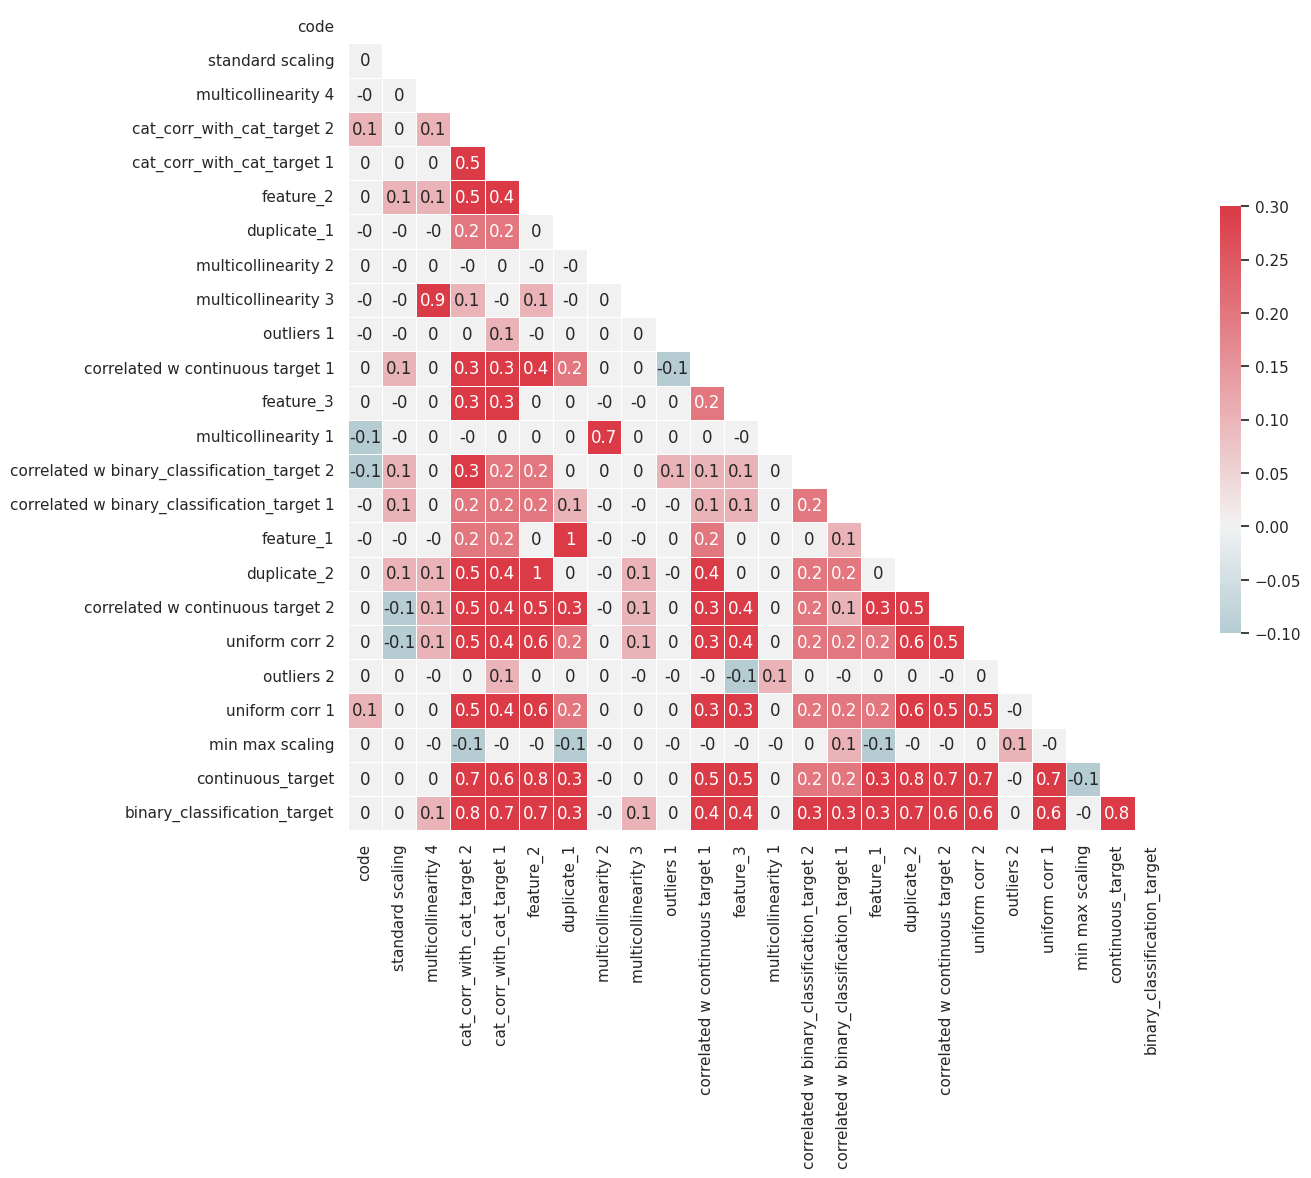

In [ ]:
# show correlation between the features
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = df[df_numerical].corr().round(1)

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(14, 12))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

In [ ]:
# calculate the correlation matrix
corr_matrix = df[df_numerical].corr()

# Create a mask for the upper triangle (to avoid duplicates)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Convert the correlation matrix to a long format
corr_df = corr_matrix.stack().reset_index()
corr_df.columns = ['feature1', 'feature2', 'correlation']

# Filter for correlations above a certain threshold (e.g., 0.7)
high_corr_df = corr_df[(abs(corr_df['correlation']) > 0.7) & (corr_df['feature1'] != corr_df['feature2'])]

# Sort by absolute correlation in descending order
high_corr_df = high_corr_df.sort_values(by='correlation', ascending=False, key=abs)

# Print the top correlated features
# print(high_corr_df['feature1'].to_list()[4:10])
print(high_corr_df)

# Create a variable to pickle
data = {'correlation scores': high_corr_df}

                             feature1                          feature2  \
159                       duplicate_1                         feature_1   
136                         feature_2                       duplicate_2   
366                         feature_1                       duplicate_1   
389                       duplicate_2                         feature_2   
56                multicollinearity 4               multicollinearity 3   
194               multicollinearity 3               multicollinearity 4   
95         cat_corr_with_cat_target 2      binary_classification_target   
555      binary_classification_target        cat_corr_with_cat_target 2   
551                 continuous_target      binary_classification_target   
574      binary_classification_target                 continuous_target   
544                 continuous_target                       duplicate_2   
142                         feature_2                 continuous_target   
533                 conti

In [ ]:
# check for vif
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# handle null values (using mean imputation for simplicity)
targets = ['continuous_target', 'binary_classification_target']
x_copy = df.drop(targets, axis=1)._get_numeric_data()
x_copy.fillna(x_copy.mean(), inplace=True)

print(max([variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])]))

# calculate VIF
vif = pd.DataFrame()
vif["Variable"] = x_copy.columns
vif["VIF"] = [variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])]
print(vif)

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


inf


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                       Variable        VIF
0                                          code   5.345680
1                              standard scaling  19.135683
2                           multicollinearity 4   2.619148
3                    cat_corr_with_cat_target 2   3.005395
4                    cat_corr_with_cat_target 1   2.393400
5                                     feature_2        inf
6                                   duplicate_1        inf
7                           multicollinearity 2   1.666522
8                           multicollinearity 3   2.627306
9                                    outliers 1   1.015188
10             correlated w continuous target 1   1.267155
11                                    feature_3   1.703003
12                          multicollinearity 1   1.677834
13  correlated w binary_classification_target 2   1.206295
14  correlated w binary_classification_target 1   1.164921
15                                    feature_1        i

### Multicollinearity

* We want high correlation with target
* We don't want high correlation between features
* Drop correlated features
* Combine correlated features

In [ ]:
# iterate dropping features with high vif
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

removed=[]
x_copy1 = x_copy.copy()
max_vif = thresh = 10
while max_vif >= thresh:
  my_list = [variance_inflation_factor(x_copy1, i) for i in range(x_copy1.shape[1])]
  max_vif = max(my_list)
  if max_vif > thresh:
    max_index = my_list.index(max_vif)
    removed.append(x_copy1.columns[max_index])
    print(x_copy1.columns[max_index], variance_inflation_factor(x_copy1, max_index))
    x_copy1.drop(x_copy1.columns[max_index], axis=1, inplace=True)


# Calculate VIF
vif = pd.DataFrame()
vif["Variable"] = x_copy1.columns
vif["VIF"] = [variance_inflation_factor(x_copy1, i) for i in range(x_copy1.shape[1])]
print(vif)

# Create a variable to pickle
data = {'vif': vif}


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


feature_2 inf


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


duplicate_1 inf
standard scaling 19.13568257570148
                                       Variable       VIF
0                                          code  4.987161
1                           multicollinearity 4  2.614669
2                    cat_corr_with_cat_target 2  2.957927
3                    cat_corr_with_cat_target 1  2.358087
4                           multicollinearity 2  1.664875
5                           multicollinearity 3  2.620750
6                                    outliers 1  1.015127
7              correlated w continuous target 1  1.266608
8                                     feature_3  1.625816
9                           multicollinearity 1  1.676955
10  correlated w binary_classification_target 2  1.205302
11  correlated w binary_classification_target 1  1.164905
12                                    feature_1  1.311461
13                                  duplicate_2  2.747719
14             correlated w continuous target 2  2.022007
15                   

In [ ]:
print(removed)

['feature_2', 'duplicate_1', 'standard scaling']


### Outliers

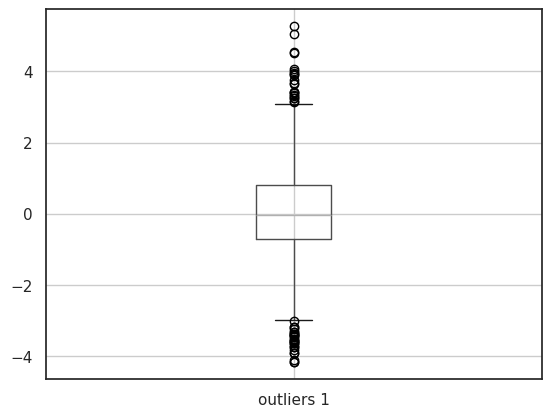

In [ ]:
# code along
df.boxplot(column=['outliers 1']);

In [ ]:
# code along
df.describe()

,code,standard scaling,multicollinearity 4,cat_corr_with_cat_target 2,cat_corr_with_cat_target 1,feature_2,duplicate_1,multicollinearity 2,multicollinearity 3,outliers 1,...,correlated w binary_classification_target 1,feature_1,duplicate_2,correlated w continuous target 2,uniform corr 2,outliers 2,uniform corr 1,min max scaling,continuous_target,binary_classification_target
count,707.000000,505.000000,910.000000,706.000000,503.000000,1010.000000,1010.000000,808.000000,809.000000,909.000000,...,708.000000,1010.000000,1010.000000,1010.000000,1010.000000,960.000000,807.000000,960.000000,1010.000000,1010.000000
mean,51699.735502,49935.370012,-0.000299,0.681303,0.552684,0.062910,-0.020239,0.002470,-0.016630,0.027971,...,0.252686,-0.020239,0.062910,4.099446,0.500116,3.000673,0.501640,348.175789,2.383008,0.500990
std,29326.063666,10100.917281,1.028059,0.815882,0.788809,1.014829,1.027875,1.053006,1.037282,1.362276,...,1.009029,1.027875,1.014829,98.152320,0.293290,2.186072,0.284398,99.681320,97.514305,0.500247
min,679.000000,22511.744146,-4.037953,0.000000,0.000000,-3.164128,-2.870770,-3.408817,-4.113016,-4.172346,...,-3.272074,-2.870770,-3.164128,-358.635652,0.000071,-3.401811,0.003031,16.452009,-353.878552,0.000000
25%,25762.000000,43400.958369,-0.715997,0.000000,0.000000,-0.631057,-0.742884,-0.685579,-0.736035,-0.722423,...,-0.419488,-0.742884,-0.631057,-66.560875,0.246137,1.516572,0.269398,284.336481,-62.361908,0.000000
50%,53564.000000,49468.003063,-0.010100,0.000000,0.000000,0.082131,-0.034974,0.018280,0.006492,-0.030676,...,0.230214,-0.034974,0.082131,5.022945,0.491984,3.099688,0.493043,343.746730,3.356277,1.000000
75%,77380.000000,57488.515005,0.710157,1.000000,1.000000,0.720758,0.651146,0.656209,0.739260,0.797749,...,0.983971,0.651146,0.720758,72.010407,0.759383,4.374349,0.740003,413.159999,68.048200,1.000000
max,99814.000000,79428.129669,3.265027,2.000000,2.000000,3.200593,3.364217,3.985533,2.765946,5.276007,...,3.892771,3.364217,3.200593,312.526388,0.998303,9.841265,0.999176,649.660370,284.825426,1.000000


In [ ]:
import pandas as pd

def count_outliers_iqr(df, column):
    """Counts the number of outliers in a DataFrame column using the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

def detect_and_print_numerical_outliers_iqr(df):
    """
    Iterates through numerical columns in a DataFrame and prints the
    variable name with the number of outliers based on the IQR method.
    """
    numerical_cols = df.select_dtypes(include=['number']).columns
    for col in numerical_cols:
        num_outliers = count_outliers_iqr(df, col)
        print(f"Variable: {col}, Number of outliers (IQR): {num_outliers}")


detect_and_print_numerical_outliers_iqr(df[df_numerical])

Variable: code, Number of outliers (IQR): 0
Variable: standard scaling, Number of outliers (IQR): 1
Variable: multicollinearity 4, Number of outliers (IQR): 7
Variable: cat_corr_with_cat_target 2, Number of outliers (IQR): 0
Variable: cat_corr_with_cat_target 1, Number of outliers (IQR): 0
Variable: feature_2, Number of outliers (IQR): 7
Variable: duplicate_1, Number of outliers (IQR): 7
Variable: multicollinearity 2, Number of outliers (IQR): 15
Variable: multicollinearity 3, Number of outliers (IQR): 4
Variable: outliers 1, Number of outliers (IQR): 49
Variable: correlated w continuous target 1, Number of outliers (IQR): 4
Variable: feature_3, Number of outliers (IQR): 7
Variable: multicollinearity 1, Number of outliers (IQR): 11
Variable: correlated w binary_classification_target 2, Number of outliers (IQR): 4
Variable: correlated w binary_classification_target 1, Number of outliers (IQR): 4
Variable: feature_1, Number of outliers (IQR): 7
Variable: duplicate_2, Number of outliers (

### Visualization

* https://matplotlib.org/stable/gallery/index.html
* http://seaborn.pydata.org/examples/
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


### Storytelling and Presentation

* https://docs.google.com/document/d/15iy9sPi84190-a7yQGMp5p5mq2hexVtcLg2qiOnHISE/edit?usp=sharing
* https://docs.google.com/document/d/1GkKYp-FOLvAw9yyI2gW4lgeYRT4sMLZtJK9sbP9mwv8/edit?usp=sharing
* https://docs.google.com/document/d/1EUp2Hxyuh60lWHsXiYCmjfiPWdUOSBXgXuV9AEOch8A/edit?usp=sharing

In [ ]:
df.to_csv('final_project_eda.csv', index=False)

## Data Prep

### Cardinality and Duplicates

In [ ]:
# check for constants
# The next line is needed to avoid error but think about how to handle discrete values
df[['discrete 1', 'discrete 2']] = df[['discrete 1', 'discrete 2']].astype('object')
consts = [
    val for val in df.columns if len(df[val].fillna(0).unique()) == 1
]

print(consts)

['constant_1', 'constant_2']


In [ ]:
df.drop(consts, axis=1, inplace=True)

In [ ]:
# quasi constant values (sometimes these may be boolean features)
quasi_consts = []
for val in df.columns.sort_values():
    if (len(df[val].unique()) < 3 and max(df[val].value_counts(normalize=True)) > .95): # maybe .99?
        quasi_consts.append(val)

quasi_consts

[]

In [ ]:
df.drop(quasi_consts, axis=1, inplace=True)

In [ ]:
# duplicate rows
df[df.duplicated(keep=False)]

,categorical_1,categorical_2,name_1,name_2,code,date,location,discrete 2,standard scaling,multicollinearity 4,...,duplicate_2,random choice 2,correlated w continuous target 2,random label num 13,uniform corr 2,outliers 2,uniform corr 1,min max scaling,continuous_target,binary_classification_target
0,NaN,cl 3,Jason,Stanton,28529.0,1966-01-27,HCL 5,sad,NaN,0.045339,...,-1.251450,Rand Choice 2,-58.319251,label num hi 1,0.246115,3.930181,NaN,293.074473,-78.140043,0
1,bl 2,NaN,Brett,Graves,59133.0,1940-01-20,HCL 16,ok,NaN,0.480567,...,-1.959065,Rand Choice 1,-199.278285,label num hi 7,0.022258,2.966750,0.343847,297.838168,-233.883540,0
2,NaN,cl 2,Jonathan,Wall,26410.0,NaN,HCL 28,happy,NaN,0.460851,...,-1.159204,NaN,-43.053587,label num hi 9,0.478828,-0.371389,0.281476,508.592983,-86.217691,0
3,bl 2,NaN,Robert,Cole,NaN,1941-01-18,HCL 28,meh,NaN,-0.016080,...,-0.063328,Rand Choice 1,-104.751808,label num hi 1,0.011607,4.780600,0.286425,387.171507,-27.070538,0
4,bl 1,cl 1,Kelly,Foster,NaN,2011-09-11,HCL 11,blue,NaN,1.125582,...,1.816167,Rand Choice 1,-15.964666,NaN,0.683147,1.424828,0.760708,335.818660,13.263339,1
5,bl 2,cl 1,James,Hill,5184.0,1943-11-27,HCL 8,meh,33869.567674,0.442715,...,0.653803,Rand Choice 1,142.936086,label num hi 1,0.463420,2.236316,0.864315,202.130344,46.907901,1
6,NaN,cl 2,Christopher,Bennett,65680.0,2009-09-18,HCL 4,ok,61508.084786,-0.150419,...,0.814788,Rand Choice 2,90.409540,NaN,0.838522,5.484095,NaN,346.574731,91.148173,1
7,NaN,NaN,Melanie,Sharp,86589.0,1953-11-04,HCL 33,happy,45687.383539,0.399635,...,1.668108,NaN,54.316781,label num hi 13,0.926637,4.087780,0.878099,494.763046,133.238962,1
8,bl 1,cl 1,Jessica,Gray,NaN,1981-03-01,HCL 20,happy,58697.720672,1.044067,...,-0.359809,Rand Choice 1,-70.607648,label num hi 6,0.599814,1.477685,NaN,315.432013,11.768484,1
9,bl 2,cl 1,Jacob,Yang,66682.0,1934-08-13,NaN,blue,73721.149796,-0.372501,...,-1.083072,NaN,-12.600153,label num hi 5,0.019234,5.529301,0.172104,430.685829,-45.344836,0


In [ ]:
# drop duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
# check of duplicate columns
duplicate_features = []
for i in range(0, len(df.columns)):
    orig = df.columns[i]

    for dupe in df.columns[i + 1:]:
        if df[orig].equals(df[dupe]):
            duplicate_features.append(dupe)

duplicate_features

['duplicate_2', 'feature_1']

In [ ]:
df.drop(duplicate_features, axis=1, inplace=True)

### Missing Values

In [ ]:
# check for nulls
df.isnull().sum()

,0
categorical_1,300
categorical_2,200
name_1,0
name_2,0
code,300
date,200
location,50
discrete 2,0
standard scaling,500
multicollinearity 4,100


In [ ]:
for feat in df.columns[df.isnull().sum() > 1]:
  if df[feat].dtype == 'object':
    print('object', feat)
    df[feat].fillna(df[feat].mode()[0], inplace=True)
  else:
    print('numeric', feat, df[feat].skew())
    if abs(df[feat].skew()) < .8:
      df[feat].fillna(round(df[feat].mean(), 2), inplace=True)
    else:
      df[feat].fillna(df[feat].median(), inplace=True)

df.isnull().sum()

object categorical_1
object categorical_2
numeric code -0.04935199911525098
object date
object location
numeric standard scaling -0.07790060986474844
numeric multicollinearity 4 -0.007874350561349391
object pd qcut3
numeric cat_corr_with_cat_target 2 0.6465947694052303
object random choice 4
numeric cat_corr_with_cat_target 1 0.9760344380576439
object pd qcut1
object random label num 4
numeric multicollinearity 2 -0.057916638127688394
numeric multicollinearity 3 -0.15654853605808575
object random choice 7
object pd qcut2
numeric outliers 1 0.09149114741016925
numeric correlated w continuous target 1 0.014312407012754751
numeric multicollinearity 1 0.009888833099915584
numeric correlated w binary_classification_target 2 -0.04078840390723099
numeric correlated w binary_classification_target 1 -0.007255255895500563
object random choice 2
object random label num 13
numeric outliers 2 0.01533016002713362
numeric uniform corr 1 0.03799564346724032
numeric min max scaling -0.03646915374210929

<ipython-input-47-b89f46d52d33>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feat].fillna(df[feat].mode()[0], inplace=True)
<ipython-input-47-b89f46d52d33>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

,0
categorical_1,0
categorical_2,0
name_1,0
name_2,0
code,0
date,0
location,0
discrete 2,0
standard scaling,0
multicollinearity 4,0


### Scaling and Outliers

In [ ]:
# Treat labels like zipcodes as objects, not numbers
df['code'] = df['code'].astype('object')

In [ ]:
# What feature has the highest value (or lowest?)
df._get_numeric_data().idxmax(1)[0]

'standard scaling'

In [ ]:
# Scale feature with highest value range
from sklearn.preprocessing import StandardScaler

feat = str(df._get_numeric_data().idxmax(1)[0])
scaler = StandardScaler()
df[feat] = scaler.fit_transform(df[[feat]].values)

In [ ]:
# Scale next feature with highest value range
from sklearn.preprocessing import MinMaxScaler

feat = str(df._get_numeric_data().idxmax(1)[0])
scaler = MinMaxScaler()
df[feat] = scaler.fit_transform(df[[feat]].values)

In [ ]:
# Identify outliers
for feat in df._get_numeric_data().columns[1:]:
    q1 = df[feat].quantile(0.25)
    q3 = df[feat].quantile(0.75)
    iqr = q3 - q1
    lower_fence = (q1 - 1.5 * iqr)
    upper_fence = (q3 + 1.5 * iqr)
    lower_count = df[feat][df[feat] < lower_fence].count()
    upper_count = df[feat][df[feat] > upper_fence].count()
    print(f'{feat} outliers = {lower_count + upper_count}: lower_fence: {lower_fence}, upper_fence: {upper_fence}, lower_count: {lower_count}, upper_count: {upper_count}')

multicollinearity 4 outliers = 17: lower_fence: -2.5302158916531403, upper_fence: 2.540563365063957, lower_count: 7, upper_count: 10
cat_corr_with_cat_target 2 outliers = 0: lower_fence: -1.5, upper_fence: 2.5, lower_count: 0, upper_count: 0
cat_corr_with_cat_target 1 outliers = 183: lower_fence: 0.0, upper_fence: 0.0, lower_count: 0, upper_count: 183
feature_2 outliers = 7: lower_fence: -2.6512651097420963, upper_fence: 2.743108797269052, lower_count: 4, upper_count: 3
duplicate_1 outliers = 7: lower_fence: -2.8180941671166773, upper_fence: 2.729346071389544, lower_count: 2, upper_count: 5
multicollinearity 2 outliers = 48: lower_fence: -1.9376340107251226, upper_fence: 1.9955561958009818, lower_count: 28, upper_count: 20
multicollinearity 3 outliers = 24: lower_fence: -2.1619346664842523, upper_fence: 2.1538836718984387, lower_count: 15, upper_count: 9
outliers 1 outliers = 76: lower_fence: -2.4723726149775276, upper_fence: 2.476229034372485, lower_count: 37, upper_count: 39
correlat

In [ ]:
from sklearn.preprocessing import RobustScaler

numeric_df = df.select_dtypes(include=np.number)
non_numeric_df = df.select_dtypes(exclude=np.number)

scaler = RobustScaler()
scaled_numeric_values = scaler.fit_transform(numeric_df)
scaled_numeric_df = pd.DataFrame(scaled_numeric_values, columns=numeric_df.columns)

# Combine the scaled numeric columns with the non-numeric columns
df = pd.concat([scaled_numeric_df, non_numeric_df], axis=1)

In [ ]:
print(df.shape)
df.info()

(1000, 40)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   standard scaling                             1000 non-null   float64
 1   multicollinearity 4                          1000 non-null   float64
 2   cat_corr_with_cat_target 2                   1000 non-null   float64
 3   cat_corr_with_cat_target 1                   1000 non-null   float64
 4   feature_2                                    1000 non-null   float64
 5   duplicate_1                                  1000 non-null   float64
 6   multicollinearity 2                          1000 non-null   float64
 7   multicollinearity 3                          1000 non-null   float64
 8   outliers 1                                   1000 non-null   float64
 9   correlated w continuous target 1             1000 non-null   flo

## Feature Engineering

### OHE

In [ ]:
for feat in df.select_dtypes('object'):
  print(f'{feat} has {len(df[feat].value_counts())} unique labels')

categorical_1 has 2 unique labels
categorical_2 has 3 unique labels
name_1 has 359 unique labels
name_2 has 473 unique labels
code has 697 unique labels
date has 790 unique labels
location has 50 unique labels
discrete 2 has 5 unique labels
pd qcut3 has 6 unique labels
discrete 1 has 3 unique labels
random choice 4 has 4 unique labels
pd qcut1 has 2 unique labels
random label num 4 has 4 unique labels
random choice 7 has 7 unique labels
pd qcut2 has 4 unique labels
semi_constant_1 has 3 unique labels
semi_constant_2 has 3 unique labels
random choice 2 has 2 unique labels
random label num 13 has 13 unique labels


In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_features = []
for feat in df.select_dtypes('object'):
  if len(df[feat].value_counts()) < 3:
    df[feat] = df[feat].map({df[feat].value_counts().index[0]: 0, df[feat].value_counts().index[1]: 1})
  elif 2 < len(df[feat].value_counts()) < 6:
    cat_features.append(feat)
  elif len(df[feat].value_counts()) > 5:
    freq = df.groupby(feat).size()/len(df)
    df[feat] = df[feat].map(freq)

ohe = OneHotEncoder(categories='auto', drop='first', sparse_output=False, handle_unknown='ignore')
ohe_df = ohe.fit_transform(df[cat_features])
ohe_df = pd.DataFrame(ohe_df, columns=ohe.get_feature_names_out(cat_features))
df.index = df.index
df = df.join(ohe_df)
df.drop(cat_features, axis=1, inplace=True)

## Feature Selection, Modeling, and Evaluation

### Regression

In [ ]:
from sklearn.model_selection import train_test_split

targets = ['continuous_target', 'binary_classification_target']
X_train, X_test, y_train, y_test = train_test_split(df.drop(targets, axis=1), df['continuous_target'], test_size=0.3, random_state=random_state)
X_train.shape, X_test.shape

((700, 51), (300, 51))

In [ ]:
# lasso
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE

print("Lasso Regression Results:")
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

selected_features = []
print("\nLasso Model Coefficients Greater Than 0:")
for feature, coef in zip(X_train.columns, lasso_model.coef_):
  if coef != 0:
    print(f"{feature}: {coef}")
    selected_features.append(feature)
print("\nLasso Model Intercept:")
print(lasso_model.intercept_)


Lasso Regression Results:
R-squared (R2): 0.90497729256919
Mean Absolute Error (MAE): 0.1751230135187366
Mean Squared Error (MSE): 0.05061481637203068
Root Mean Squared Error (RMSE): 0.22497736857744308

Lasso Model Coefficients Greater Than 0:
standard scaling: -0.0005358160237336769
feature_2: 0.5923060065539476
duplicate_1: 0.14175435734533848
feature_3: 0.31742121418090735
correlated w continuous target 2: 0.04370299779787856

Lasso Model Intercept:
0.007046250099420344


In [ ]:
# mutual information for regression
from sklearn.feature_selection import mutual_info_regression, SelectKBest

k=5
mutual_info = mutual_info_regression(X_train, y_train)
selector = SelectKBest(mutual_info_regression, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
selected_feature_names = X_train.columns[selector.get_support()]
print("\nSelected features using mutual information:")
print(selected_feature_names)


Selected features using mutual information:
Index(['feature_2', 'pd qcut3', 'pd qcut2_Q2', 'pd qcut2_Q3', 'pd qcut2_Q4'], dtype='object')


In [ ]:
# linear regression
from sklearn.linear_model import LinearRegression

# Challenge: Only build the model with selected features

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE

# Print the results
print("Linear Regression Results:")
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Optionally, you can inspect the model's coefficients:
# print("\nLinear Model Coefficients:")
# for feature, coef in zip(X_train.columns, model.coef_):
#     print(f"{feature}: {coef}")
# print("\nLinear Model Intercept:")
# print(model.intercept_)

Linear Regression Results:
R-squared (R2): 0.9888239616102558
Mean Absolute Error (MAE): 0.06348418586632143
Mean Squared Error (MSE): 0.005953031082339586
Root Mean Squared Error (RMSE): 0.07715588818968767


### Classification

In [ ]:
from sklearn.model_selection import train_test_split

targets = ['continuous_target', 'binary_classification_target']
X_train, X_test, y_train, y_test = train_test_split(df.drop(targets, axis=1), df['binary_classification_target'], test_size=0.3, random_state=random_state)
X_train.shape, X_test.shape

((700, 51), (300, 51))

In [ ]:
# mutual information for classification
from sklearn.feature_selection import mutual_info_classif, SelectKBest

k=5
mi = mutual_info_classif(X_train, y_train)
selector = SelectKBest(mutual_info_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
selected_features = X_train.columns[selector.get_support()]

print(f"\nSelected {k} best features: {selected_features}")
X_test_selected = selector.transform(X_test)


Selected 5 best features: Index(['cat_corr_with_cat_target 2', 'feature_2', 'pd qcut3', 'pd qcut1',
       'pd qcut2_Q4'],
      dtype='object')


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

selections = SelectFromModel(estimator=LogisticRegression()).fit(X_scaled, y_train)
mt_keepers = X_train.columns.values[selections.get_support()]
print(mt_keepers)

['cat_corr_with_cat_target 2' 'cat_corr_with_cat_target 1' 'feature_2'
 'duplicate_1' 'correlated w continuous target 1' 'feature_3'
 'correlated w binary_classification_target 1'
 'correlated w continuous target 2' 'uniform corr 2' 'uniform corr 1'
 'pd qcut1' 'discrete 1_Medium' 'pd qcut2_Q2' 'pd qcut2_Q3' 'pd qcut2_Q4']


In [ ]:
# RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=5) # Select the top 5 features
X_new = selector.fit_transform(X_scaled, y_train)
rf_keepers = X_train.columns.values[selections.get_support()]
print(rf_keepers)

['cat_corr_with_cat_target 2' 'cat_corr_with_cat_target 1' 'feature_2'
 'duplicate_1' 'correlated w continuous target 1' 'feature_3'
 'correlated w binary_classification_target 1'
 'correlated w continuous target 2' 'uniform corr 2' 'uniform corr 1'
 'pd qcut1' 'discrete 1_Medium' 'pd qcut2_Q2' 'pd qcut2_Q3' 'pd qcut2_Q4']


In [ ]:
# Random forest importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

selects = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=random_state), max_features=4)
selects.fit(X_train, y_train)
rfi = X_train.columns[(selects.get_support())]
rfi.tolist()

['cat_corr_with_cat_target 2', 'feature_2', 'pd qcut1', 'pd qcut2_Q3']

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Challenge: Only build the model with selected features

model = LogisticRegression()
model.fit(X_scaled, y_train)
y_pred = model.predict(X_test.values)
train_accuracy = model.score(X_scaled, y_train)
test_accuracy = model.score(X_test.values, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nLogistic Regression Results:")
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Logistic Regression Results:
Training Accuracy: 0.9985714285714286
Test Accuracy: 0.9

Confusion Matrix:
 [[123  29]
 [  1 147]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.99      0.81      0.89       152
         0.0       0.84      0.99      0.91       148

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300

